In [ ]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# GPU info

In [ ]:
!nvidia-smi

Fri Sep  8 00:52:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Unzip datasets

In [ ]:
!unzip /content/drive/MyDrive/A_new_datasets/ULTIMUL_SET2_BUN_80%copy_paste_train_doar_cu_persoane_BUN.zip -d /content/

In [ ]:
!unzip /content/drive/MyDrive/datasets/train_cat_100_doarcat.zip -d /content/train_cat_100_doarcat

In [ ]:
!unzip /content/drive/MyDrive/datasets/person_train_80cp.zip -d /content/person_train_80cp

In [ ]:
!unzip /content/drive/MyDrive/datasets/Train30-farapers.zip -d /content/30_farapers


In [ ]:
!unzip /content/drive/MyDrive/datasets/coco/annotations_trainval2017.zip -d /content
#!unzip /content/drive/MyDrive/datasets/coco/train2017.zip -d /content
!unzip /content/drive/MyDrive/datasets/coco/val2017.zip -d /content

In [ ]:
!unzip /content/drive/MyDrive/datasets/person_train_51cp.zip -d /content/train51

# Count the images in a directory

In [ ]:
import os
from PIL import Image

def count_images_in_directory(directory_path):
    image_extensions = ['.jpg']
    image_count = 0

    try:
        for filename in os.listdir(directory_path):
            if any(filename.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    except FileNotFoundError:
        print("The directory wasn't found.")

    return image_count

directory_path = '/content/person_train_copy_paste3'
image_count = count_images_in_directory(directory_path)
print(f"The number of images in the specified folder is: {image_count}")


# Count the number of instances of the specified category

In [ ]:
import json
"""
def count_person_instances(file_path):

    with open(file_path, 'r') as f:
        data = json.load(f)

    if "categories" not in data:
        raise ValueError("The JSON file does not contain the key 'categories'.")

    person_id = None
    for category in data["categories"]:
        if category["name"] == "person":
            person_id = category["id"]
            break

    if person_id is None:
        raise ValueError("The category 'person' was not found in the JSON file")
    count = 0
    for annotation in data["annotations"]:
        if annotation["category_id"] == person_id:
            count += 1

    return count
"""

def count_car_instances(file_path):

    with open(file_path, 'r') as f:
        data = json.load(f)

    if "categories" not in data:
        raise ValueError('The JSON file does not contain the key 'categories'.')

    car_id = None
    for category in data["categories"]:
        if category["name"] == "car":
            car_id = category["id"]
            break

    if car_id is None:
        raise ValueError("The category 'cat' was not found in the JSON file")
    count = 0
    for annotation in data["annotations"]:
        if annotation["category_id"] == car_id:
            count += 1

    return count

In [ ]:
count_car_instances("/content/annotations/instances_train2017.json")

43867

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!unzip /content/drive/MyDrive/datasets/all_train_100_CP_dataset.zip -d /content/train50

# Update image and ann ids

In [ ]:
import json
from pycocotools.coco import COCO


coco = COCO("/content/annotations_2.json")

id_mapping = {}

for j, image in enumerate(coco.dataset["images"]):
    old_id = image['id']
    new_id = j
    id_mapping[old_id] = new_id
    image['id'] = new_id


for i, ann in enumerate(coco.dataset["annotations"]):
    ann['id'] = i
    old_image_id = ann['image_id']
    new_image_id = id_mapping.get(old_image_id)

    if new_image_id is not None:
        ann['image_id'] = new_image_id
    else:
        print(f"No new ID found for the old image ID {old_image_id}")


with open('/content/copy-paste_farapers_80.json', 'w') as f:
    json.dump(coco.dataset, f)


loading annotations into memory...
Done (t=18.13s)
creating index...
index created!


In [ ]:
import json
from pycocotools.coco import COCO
coco = COCO("/content/content/final_GAN_annotations.json")
for i, ann in enumerate(coco.dataset["annotations"]):
  ann['id'] = i

with open('/content/gan50_idunic.json', 'w') as f:
    json.dump(coco.dataset, f)

loading annotations into memory...
Done (t=31.31s)
creating index...
index created!


# If the obtained dataset does not have the "info" and "licenses" section

In [ ]:

import json
with open('/content/annotations/instances_train2017.json', 'r') as coco_file:
    train_json = json.load(coco_file)

with open('/content/copy-paste_farapers_80.json', 'r') as my_file:
    cp_json = json.load(my_file)


info_train = train_json['info']
licenses_train = train_json['licenses']

cp_json['info'] = info_train
cp_json['licenses'] = licenses_train


with open('/content/copy-paste_farapers_80_infolic.json', 'w') as f:
    json.dump(cp_json, f)


# Use coco-manager to filter the datasets to contain only info about the desired category

In [ ]:
!git clone https://github.com/immersive-limit/coco-manager.git


Cloning into 'coco-manager'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 2), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), done.
Resolving deltas: 100% (2/2), done.


In [ ]:
import sys
path = "/content/coco-manager"
sys.path.append(path)

In [ ]:
!python /content/coco-manager/filter.py --input_json /content/copy-paste_farapers_80_infolic.json --output_json /content/copy-paste_farapers_80-filtered.json --categories person


Loading json file...
Processing input json...
Filtering...
Saving new json file...
Filtered json saved.


In [ ]:
!python /content/coco-manager/filter.py --input_json /content/annotations/instances_train2017.json --output_json /content/annotations/instances_train2017-filtered.json --categories person


Loading json file...
Processing input json...
Filtering...
Saving new json file...
Filtered json saved.


In [ ]:
!python /content/coco-manager/filter.py --input_json /content/annotations/instances_val2017.json --output_json /content/annotations/instances_val2017-filtered.json --categories person

Loading json file...
Processing input json...
Filtering...
Saving new json file...
Filtered json saved.


# Detectron2 dependencies

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44089 sha256=d8c892e10a3687ecb752f6547eda6d5e23dfb867e773f43963eff775e9dc0dcf
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2023.8.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
distributed 2023.8.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
flax 0.7.2 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.

In [ ]:
#!pip install fvcore
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
import detectron2
print(detectron2.__version__)


2.0.1+cu118 True
0.6


In [ ]:
!pip show fvcore
!pip show iopath
import sys
#sys.path.append('/usr/local/lib/python3.8/dist-packages')

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Name: fvcore
Version: 0.1.5.post20221221
Summary: Collection of common code shared among different research projects in FAIR computer vision team
Home-page: https://github.com/facebookresearch/fvcore
Author: FAIR
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: iopath, numpy, Pillow, pyyaml, tabulate, termcolor, tqdm, yacs
Required-by: 
Name: iopath
Version: 0.1.9
Summary: A library for providing I/O abstraction.
Home-page: https://github.com/facebookresearch/iopath
Author: FAIR
Author-email: 
License: MIT licensed, as found in the LICENSE file
Location: /usr/local/lib/python3.10/dist-packages
Requires: portalocker, tqdm
Required-by: fvcore


In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)


[09/08 06:11:56 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:01, 155MB/s]                           


# Visualise random images and the desired instances

[09/08 06:13:19 d2.data.datasets.coco]: Loading /content/copy-paste_farapers_80-filtered.json takes 18.51 seconds.
[09/08 06:13:19 d2.data.datasets.coco]: Loaded 117266 images in COCO format from /content/copy-paste_farapers_80-filtered.json
WARNING [09/08 06:13:20 d2.data.datasets.coco]: Filtered out 203 instances without valid segmentation. There might be issues in your dataset generation process.  Please check https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html carefully


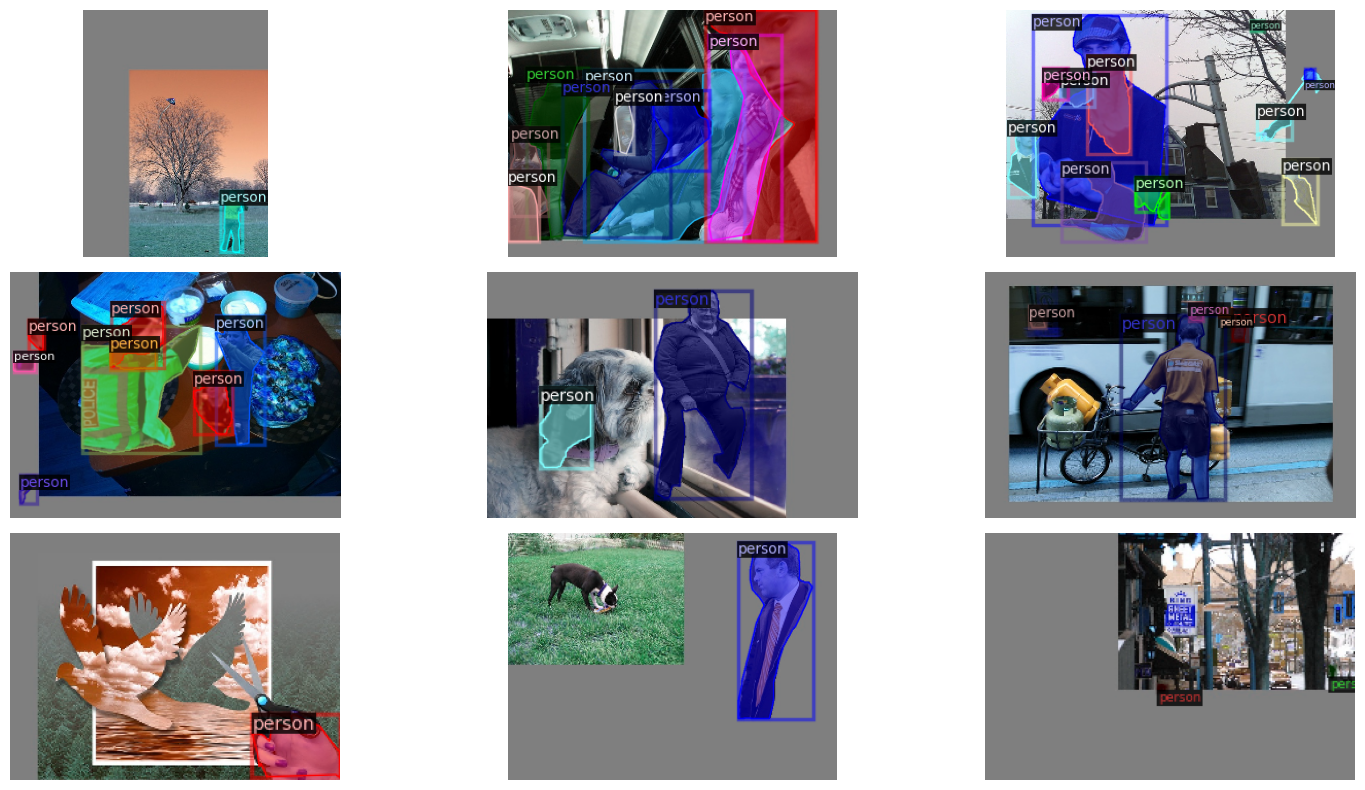

In [ ]:
import random
import cv2
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
import os
from google.colab.patches import cv2_imshow
from detectron2.model_zoo import model_zoo
from detectron2.utils.visualizer import Visualizer
import matplotlib.pyplot as plt

# Register the dataset

register_coco_instances("train_2017_80farapers",
                         {},
                         "/content/copy-paste_farapers_80-filtered.json",
                         "/content/person_train_copy_paste2")

register_coco_instances("val_2017",
                         {},
                         "/content/annotations/instances_val2017-filtered.json",
                         "/content/val2017")


metadata_train = MetadataCatalog.get("train_2017_80farapers").set(thing_classes=["person"])
dataset_dicts = DatasetCatalog.get("train_2017_80farapers")
metadata_val = MetadataCatalog.get("val_2017").set(thing_classes=["person"])
"""
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata = metadata_train, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

"""

fig, axs = plt.subplots(3, 3, figsize=(16, 8))

for i, d in enumerate(random.sample(dataset_dicts, 9)):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata_train, scale=0.5)
    out = visualizer.draw_dataset_dict(d)

    ax = axs[i // 3, i % 3]
    ax.imshow(out.get_image()[:, :, ::-1])
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
!rm -r /content/train_res_5iteratii_1000 /content/train_res_5iter_1000 /content/train_res_5iteratii_hai


# Visualise the Default Trainer before any change

In [ ]:
import inspect
from detectron2.engine import DefaultTrainer

print(inspect.getsource(DefaultTrainer))


class DefaultTrainer(TrainerBase):
    """
    A trainer with default training logic. It does the following:

    1. Create a :class:`SimpleTrainer` using model, optimizer, dataloader
       defined by the given config. Create a LR scheduler defined by the config.
    2. Load the last checkpoint or `cfg.MODEL.WEIGHTS`, if exists, when
       `resume_or_load` is called.
    3. Register a few common hooks defined by the config.

    It is created to simplify the **standard model training workflow** and reduce code boilerplate
    for users who only need the standard training workflow, with standard features.
    It means this class makes *many assumptions* about your training logic that
    may easily become invalid in a new research. In fact, any assumptions beyond those made in the
    :class:`SimpleTrainer` are too much for research.

    The code of this class has been annotated about restrictive assumptions it makes.
    When they do not work for you, you're encouraged to:

    1. O

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
from detectron2.data import build_detection_train_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data import DatasetMapper


from detectron2.engine import DefaultTrainer, HookBase
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
import os

# Configure the model

In [ ]:

from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_2017_80farapers",)
cfg.DATASETS.TEST = ("val_2017",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 8 # as high as the GPU allows
cfg.SOLVER.BASE_LR = 0.0005  # higher value means faster learning but faster convergence
cfg.SOLVER.MAX_ITER = 2000 # ideal 1300 for me
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

"""
cfg.SOLVER.CHECKPOINT_PERIOD = 5

#output_dir = "/content/drive/MyDrive/Detectron2_person_results"
#output_dir = "/content/drive/MyDrive/copy-paste-test-anns/results1"
output_dir = "/content/train30_results_100it"

eval_results_dir = os.path.join(output_dir, "eval_results")
os.makedirs(eval_results_dir, exist_ok=True)

cfg.OUTPUT_DIR = output_dir
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CustomTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()
"""


'\ncfg.SOLVER.CHECKPOINT_PERIOD = 5\n\n#output_dir = "/content/drive/MyDrive/Detectron2_person_results"\n#output_dir = "/content/drive/MyDrive/copy-paste-test-anns/results1"\noutput_dir = "/content/train30_results_100it"\n\neval_results_dir = os.path.join(output_dir, "eval_results")\nos.makedirs(eval_results_dir, exist_ok=True)\n\ncfg.OUTPUT_DIR = output_dir\nos.makedirs(cfg.OUTPUT_DIR, exist_ok=True)\ntrainer = CustomTrainer(cfg)\ntrainer.resume_or_load(resume=True)\ntrainer.train()\n'

# Save output every k iterations

In [ ]:
cfg.TEST.EVAL_PERIOD = 100

# Implement earyy stopping to the Default Trainer and train

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

class CustomTrainer(DefaultTrainer):

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

    def __init__(self, cfg):
      super().__init__(cfg)
      self.best_metric = float('-inf')
      self.no_improve = 0
      self.patience = 5

    def after_eval(self, eval_results):

        current_metric_bbox = eval_results.get('bbox/AP', float('-inf'))
        current_metric_segm = eval_results.get('segm/AP', float('-inf'))

        if current_metric_bbox > self.best_metric or current_metric_segm > self.best_metric:

            self.best_metric = max(current_metric_bbox, current_metric_segm)
            self.no_improve = 0
        else:

            self.no_improve += 1

        if self.no_improve >= self.patience:
            print("Early stopping.")
            raise StopIteration()

trainer = CustomTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import shutil
shutil.make_archive("/80farapers_0.0005_8", 'zip', "/content/output")

'/80farapers_0.0005_8.zip'

In [ ]:
!cp /content/rezg_cat_100.zip /content/drive/MyDrive/Rezultate-detectron-cp/

In [ ]:
!pip install tensorboard

In [ ]:
!unzip "/content/drive/MyDrive/Rezultate-detectron-cp/trainnormal_results.zip" -d "/content"

Archive:  /content/drive/MyDrive/Rezultate-detectron-cp/trainnormal_results.zip
   creating: /content/content/output_normal/
  inflating: /content/content/output_normal/events.out.tfevents.1692911160.6d3e495dfd61.434.0  
 extracting: /content/content/output_normal/last_checkpoint  
  inflating: /content/content/output_normal/model_final.pth  
   creating: /content/content/output_normal/inference/
  inflating: /content/content/output_normal/inference/coco_instances_results.json  
  inflating: /content/content/output_normal/inference/instances_predictions.pth  
  inflating: /content/content/output_normal/metrics.json  


In [ ]:
!cp /content/output_51+train_batch4.zip /content/drive/MyDrive/Rezultate-detectron-cp/cp51+train

# Remove the color of unsegmented pixels

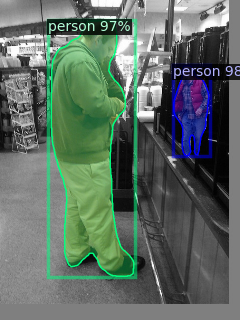

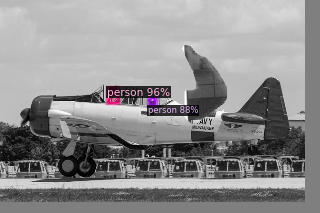

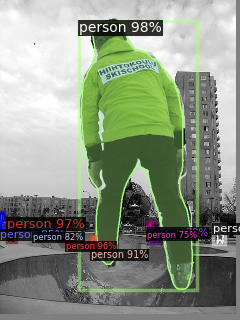

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=metadata_train,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
print(metadata_train.thing_classes)
print(outputs["instances"].pred_classes)


['person']
tensor([0, 0, 0, 0], device='cuda:0')


In [ ]:
!mv val2017.zip /content/drive/MyDrive/datasets/coco/
!mv train2017.zip /content/drive/MyDrive/datasets/coco/
!mv annotations_trainval2017.zip /content/drive/MyDrive/datasets/coco/


In [ ]:
!sudo apt-get install python3-distutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-distutils is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


# Visualise output and statistics

In [ ]:

%load_ext tensorboard
%tensorboard --logdir output
"""
%reload_ext tensorboard
%tensorboard --logdir /content/content --port 6009
"""

# Zip results and save them

In [ ]:
!zip -r /content/Detectron2_person_results.zip /content/drive/MyDrive/Detectron2_person_results


updating: content/drive/MyDrive/Detectron2_person_results/ (stored 0%)
updating: content/drive/MyDrive/Detectron2_person_results/metrics.json (deflated 75%)
updating: content/drive/MyDrive/Detectron2_person_results/events.out.tfevents.1689840722.2d71fa39778d.5844.0 (deflated 71%)
updating: content/drive/MyDrive/Detectron2_person_results/model_final.pth (deflated 7%)
updating: content/drive/MyDrive/Detectron2_person_results/last_checkpoint (stored 0%)
updating: content/drive/MyDrive/Detectron2_person_results/instances_predictions.pth (deflated 49%)
updating: content/drive/MyDrive/Detectron2_person_results/coco_instances_results.json (deflated 57%)


In [ ]:
from google.colab import files
files.download('/content/Detectron2_person_results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>